In [1]:
#Data and Set Up

In [28]:
#import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')


In [29]:
#Import visualization libraries and set %matplotlib inline.
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Read in the csv file as a dataframe called df
df = pd.read_csv( '911.csv' )

In [31]:
#Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [32]:
#Check the head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [33]:
#Basic Questions

#What are the top 5 townships (twp) for 911 calls?
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [34]:
#What are the top 5 townships (twp) for 911 calls?
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [35]:
#Take a look at the 'title' column, how many unique title codes are there?
#total 110
df.title.nunique()

110

In [36]:
#Creating new features
#In the titles column there are "Reasons/Departments" specified before the title code. 
#These are EMS, Fire, and Traffic. Use .apply() 
#with a custom lambda expression to create a new column called "Reason" that contains this string value.
#For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.
df['reason'] = df['title'].apply( lambda title: title.split( ':' )[0] )

In [37]:
#What is the most common Reason for a 911 call based off of this new column?
df.reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

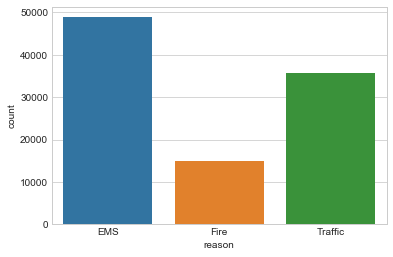

In [38]:
#Now use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x='reason', data = df )

In [39]:
#Now let us begin to focus on time information.
#What is the data type of the objects in the timeStamp column?


In [40]:
type(df['timeStamp'][0])

str

In [41]:
#You should have seen that these timestamps are still strings. 
#Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
#to convert the column from strings to DateTime objects.
df['timeStamp'] = pd.to_datetime( df['timeStamp'] )
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

In [42]:
#You can now grab specific attributes from a Datetime object by calling them. For example:

 #   time = df['timeStamp'].iloc[0]
 #   time.hour

#You can use Jupyter's tab method to explore the various attributes you can call. 
#Now that the timestamp column are actually DateTime objects, use 
#.apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off 
#of the timeStamp column, reference the solutions if you get stuck on this step.

In [43]:
df['Hour'] = df['timeStamp'].apply( lambda time: time.hour )
df['Month'] = df['timeStamp'].apply( lambda time: time.month )
df['Day'] = df['timeStamp'].apply( lambda time: time.dayofweek )


In [44]:
'''** Notice how the Day of Week is an integer 0-6. 
Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
'''

"** Notice how the Day of Week is an integer 0-6. \nUse the .map() with this dictionary to map the actual string names to the day of the week: **\n\n    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}\n"

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df.Day.map( dmap  )
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


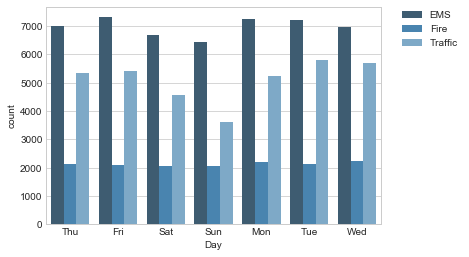

In [73]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day',  hue='reason', data = df, palette='Blues_d')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#Now do the same for Month:


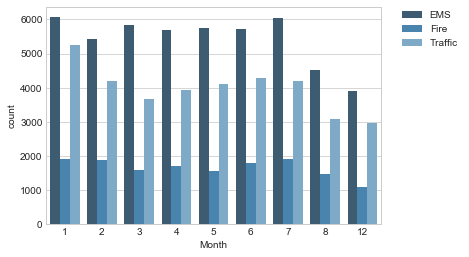

In [74]:
sns.countplot(x='Month',  hue='reason', data = df, palette='Blues_d')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [80]:
#Now create a gropuby object called byMonth, where you group the DataFrame by 
#the month column and use the count() method for aggregation.
#Use the head() method on this returned DataFrame.
byMonth = df.groupby( by='Month' ).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


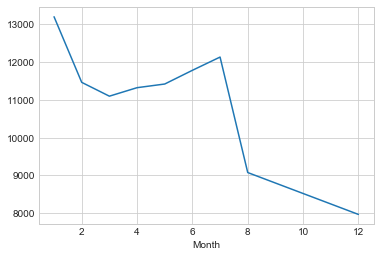

In [96]:
#Now create a simple plot off of the dataframe indicating the count of calls per month.
fig, axes = plt.subplots()

axes.plot( byMonth['reason'] )
axes.set_xlabel('Month')
